<h1 style="background-color:yellow;font-family:newtimeroman;font-size:550%;text-align:center;border-radius: 15px 50px;padding: 5px">AGE PREDICTION</h1>


<center><img src="https://assets.newatlas.com/dims4/default/8e1ebab/2147483647/strip/true/crop/2000x1333+0+0/resize/1200x800!/format/webp/quality/90/?url=http%3A%2F%2Fnewatlas-brightspot.s3.amazonaws.com%2Fef%2Fe6%2F73fef15a43e38ed11e20af5cf62e%2Fdepositphotos-11882201-l-2015.jpg",height='500',width='600'></center>


<h1 style="background-color:green;font-family:newtimeroman;font-size:400%;text-align:center;border-radius: 15px 50px;padding: 3px">OverView </h1>
<a id=0></a>

In this dataset our main objective is to predict the Age of the person by analysing his/her images. Here we have about 24k labeled examples, by using this we have to make a generalised model for predicting the Age of the person. The column pixels contains the value of pixels of the image in string format separated by a space.

<h1 style="background-color:green;font-family:newtimeroman;font-size:400%;text-align:center;border-radius: 15px 50px;padding: 3px">Importing modules and Loading datasets</h1>
<a id=1></a>

In [1]:
import  pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import keras 
from keras.models import Sequential
from keras.layers import BatchNormalization,MaxPool2D,Dense,Conv2D,Flatten
from keras.callbacks import EarlyStopping,LearningRateScheduler,ReduceLROnPlateau
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('../input/age-gender-and-ethnicity-face-data-csv/age_gender.csv')
data.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [3]:
def values_to_array(pixels):
    arr=np.array(pixels.split(),'float64')
    arr=arr.reshape(48,48)
#     print(arr.shape)
    return arr
data['pixels']=data['pixels'].apply(values_to_array)

<h1 style="background-color:green;font-family:newtimeroman;font-size:400%;text-align:center;border-radius: 15px 50px;padding: 3px">Train test spliting of data</h1>
<a id=2></a>

In [4]:
train_img,test_img,train_age,test_age=train_test_split(data['pixels'],data['age'],test_size=0.2,random_state=42)

<h1 style="background-color:green;font-family:newtimeroman;font-size:400%;text-align:center;border-radius: 15px 50px;padding: 3px">Data Visualization</h1>
<a id=3></a>

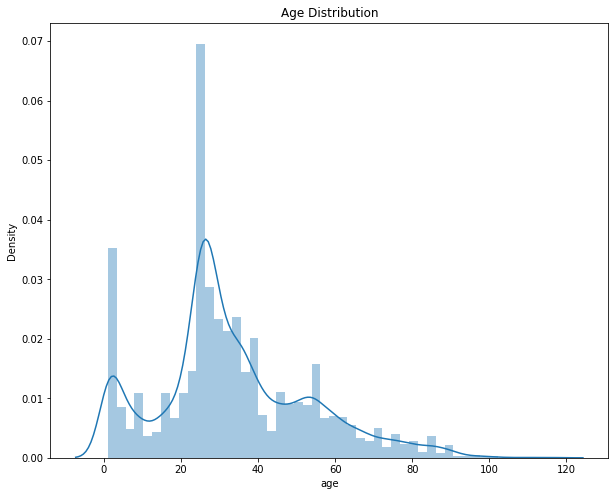

In [5]:
plt.figure(figsize=(10,8))
sns.distplot(train_age)
plt.title('Age Distribution')
plt.show()

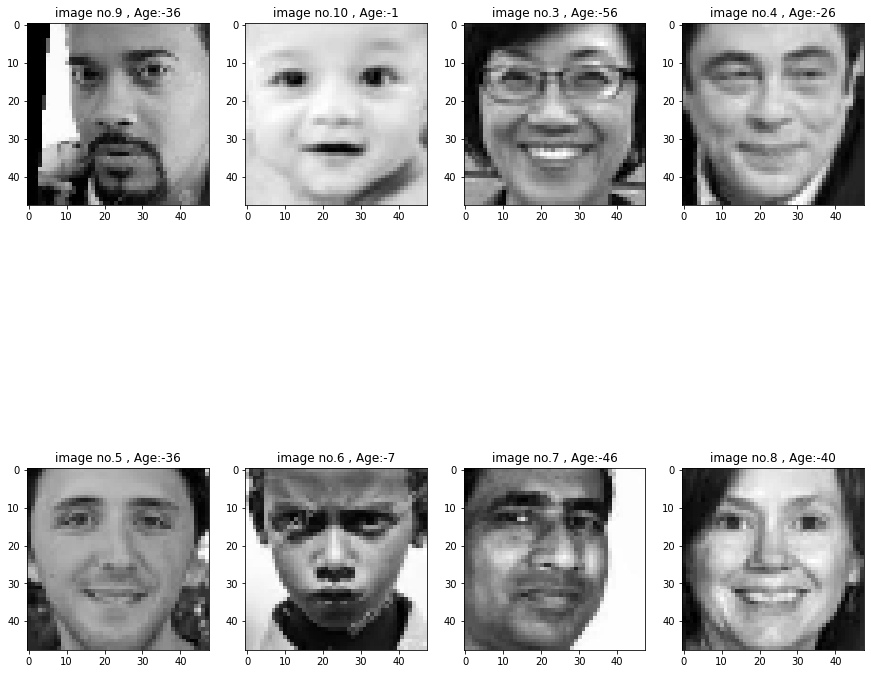

In [6]:
plt.figure(figsize=(15,15))
for i in range(0,10):
    plt.subplot(2,4,(i%8)+1)
    num=np.random.randint(1000)
    plt.title("image no.{0} , Age:-{1}".format(i+1,train_age.iloc[num]))
    plt.imshow(train_img.iloc[num],cmap='gray')
plt.show()

<h1 style="background-color:green;font-family:newtimeroman;font-size:400%;text-align:center;border-radius: 15px 50px;padding: 3px">Changing Dimension Of Data</h1>
<a id=4></a>

In [7]:
def change_image_dimension(data):
    data=np.reshape(data.to_list(),(len(data),48,48,1))
    return data

In [8]:
train_img=change_image_dimension(train_img)
test_img=change_image_dimension(test_img)
# train_img
train_img=train_img/255.0
test_img=test_img/255.0

<h1 style="background-color:green;font-family:newtimeroman;font-size:400%;text-align:center;border-radius: 15px 50px;padding: 3px">Callback Functions</h1>
<a id=5></a>

In [9]:
def schedule(epoch,lr):
    if epoch>=5:
        return 0.0001
    return 0.001
early_stop=EarlyStopping(monitor='val_mean_absolute_error',patience=2)
learning_rate_scheduler=LearningRateScheduler(schedule)
reduceLR=ReduceLROnPlateau(monitor='val_mean_absolute_error',patience=1,min_lr=0.00001)

<h1 style="background-color:green;font-family:newtimeroman;font-size:400%;text-align:center;border-radius: 15px 50px;padding: 3px">Convolutional Neural Network</h1>
<a id=5></a>

In [10]:
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',input_shape=(48,48,1)))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='relu'))

In [11]:
model.compile(optimizer='adam',loss='mse',metrics=[keras.metrics.mean_absolute_error])
r=model.fit(train_img,train_age,validation_data=(test_img,test_age),epochs=15,callbacks=[reduceLR])

Epoch 1/15
593/593 [==============================] - 7s 7ms/step - loss: 255.2652 - mean_absolute_error: 11.4862 - val_loss: 696.3656 - val_mean_absolute_error: 23.3399
Epoch 2/15
593/593 [==============================] - 4s 6ms/step - loss: 101.7484 - mean_absolute_error: 7.3791 - val_loss: 155.1772 - val_mean_absolute_error: 9.7723
Epoch 3/15
593/593 [==============================] - 3s 6ms/step - loss: 81.9910 - mean_absolute_error: 6.6214 - val_loss: 194.5355 - val_mean_absolute_error: 10.8366
Epoch 4/15
593/593 [==============================] - 3s 6ms/step - loss: 61.6083 - mean_absolute_error: 5.7988 - val_loss: 74.7888 - val_mean_absolute_error: 6.3042
Epoch 5/15
593/593 [==============================] - 4s 6ms/step - loss: 51.9977 - mean_absolute_error: 5.3823 - val_loss: 79.4801 - val_mean_absolute_error: 6.5733
Epoch 6/15
593/593 [==============================] - 3s 6ms/step - loss: 48.0348 - mean_absolute_error: 5.1774 - val_loss: 73.8320 - val_mean_absolute_error: 6.3

<h1 style="background-color:green;font-family:newtimeroman;font-size:400%;text-align:center;border-radius: 15px 50px;padding: 3px">Model Summary</h1>
<a id=7></a>

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 128)       1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 128)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 23, 23, 128)       512       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          1

<h1 style="background-color:green;font-family:newtimeroman;font-size:400%;text-align:center;border-radius: 15px 50px;padding: 3px">Curve of Mean Squared Error Losses</h1>
<a id=8></a>

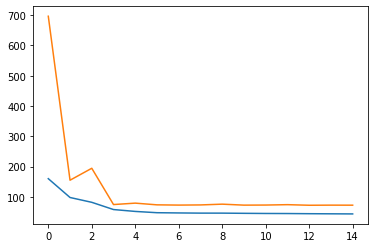

In [13]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])

<h1 style="background-color:green;font-family:newtimeroman;font-size:400%;text-align:center;border-radius: 15px 50px;padding: 3px">Curve of Absolute Mean Error Losses</h1>
<a id=8></a>

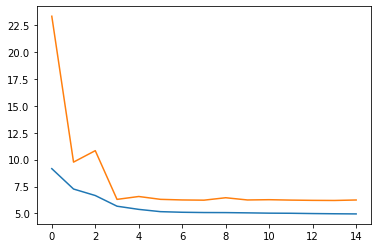

In [14]:
plt.plot(r.history['mean_absolute_error'])
plt.plot(r.history['val_mean_absolute_error'])

<h1 style="background-color:green;font-family:newtimeroman;font-size:400%;text-align:center;border-radius: 15px 50px;padding: 3px">Visualizing Train Data Prediction</h1>
<a id=12></a>

In [15]:
pred_train_Age=model.predict(train_img)
train_age=np.array(train_age,'int32')
pred_train_Age=np.reshape(pred_train_Age,(len(train_age),))
train_age=np.reshape(train_age,(len(train_age),))
train_images=np.reshape(train_img,(len(train_img),48,48))

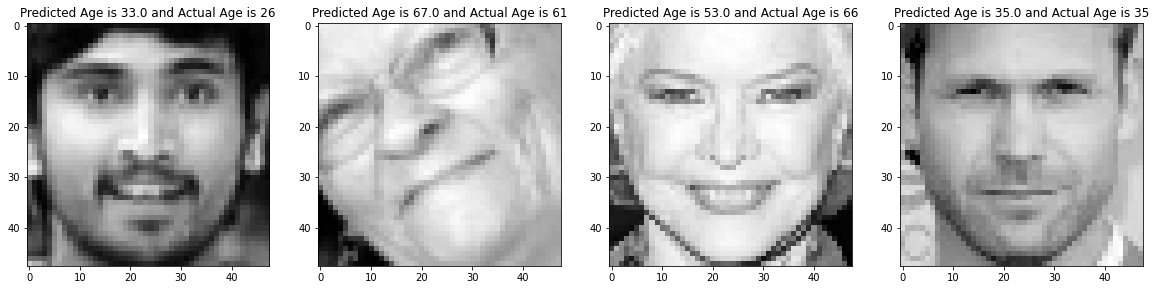

In [16]:
plt.figure(figsize=(20,15))
for i in range(0,5):
    plt.subplot(1,4,(i%4)+1)
    plt.title("Predicted Age is {0} and Actual Age is {1}".format(np.round(pred_train_Age[i]),train_age[i]))
    plt.imshow(train_images[i],cmap='gray')
plt.show()

<h1 style="background-color:green;font-family:newtimeroman;font-size:400%;text-align:center;border-radius: 15px 50px;padding: 3px">Visualizing Test Data Prediction</h1>
<a id=12></a>

In [17]:
pred_test_Age=model.predict(test_img)
test_age=np.array(test_age,'int32')
pred_test_Age=np.reshape(pred_test_Age,(len(test_age),))
test_age=np.reshape(test_age,(len(test_age),))
test_images=np.reshape(test_img,(len(test_img),48,48))

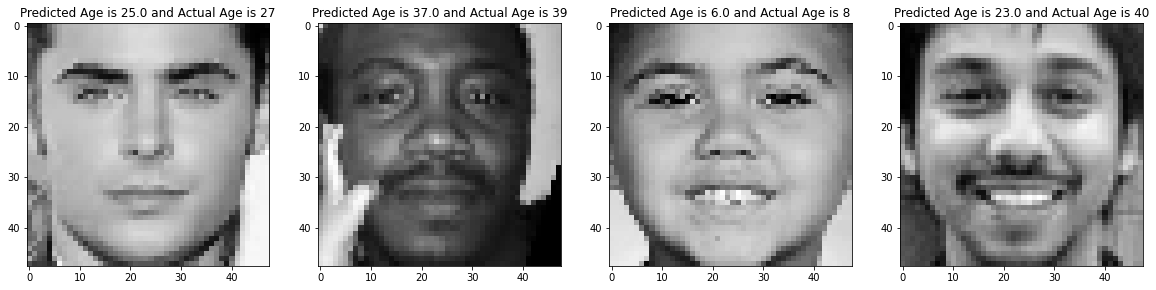

In [18]:
plt.figure(figsize=(20,15))
for i in range(0,5):
    plt.subplot(1,4,(i%4)+1)
    plt.title("Predicted Age is {0} and Actual Age is {1}".format(np.round(pred_test_Age[i]),test_age[i]))
    plt.imshow(test_images[i],cmap='gray')
plt.show()

<h1 style="background-color:green;font-family:newtimeroman;font-size:400%;text-align:center;border-radius: 15px 50px;padding: 3px">Conclusion</h1>
<a id=12></a>

<h3 style="background-color:lightblue;font-family:newtimeroman;font-size:200%;text-align:center;padding: 3px">From above prediction it can be easily seen that there is not much difference in the actual and predicted Age . so we could considered it to be an efficient model for predicting Age by the images.</h3>

<h3 style="background-color:lightyellow;font-family:newtimeroman;font-size:200%;text-align:center;padding: 3px">If you liked the notebook please upvote it and if having any queries feel free to ask in comment section.</h3>